# Tutorial

Quick tutorial on how to use the COVID-19 Knowledge Graph.

In [1]:
import os
import sys
import time

import matplotlib
import matplotlib.pyplot as plt
import pybel
import pandas as pd

# Import the covid19kg Python package
import covid19kg

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
matplotlib.style.use('seaborn')

### Notebook Provenance


In [3]:
sys.version

'3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) \n[Clang 6.0 (clang-600.0.57)]'

In [4]:
time.asctime()

'Sun Apr 12 09:17:46 2020'

In [5]:
pybel.get_version()

'0.14.6'

## Loading

The compilation of the BEL scripts and allows to explore the COVID-19 Knowledge Graph.

In [6]:
covid_19_knowledge_graph = covid19kg.get_graph()

### Content Summary

A summary of the types of nodes and edges present in the COVID-19 Knowledge Graph.

In [7]:
covid_19_knowledge_graph.summarize()

Covid19KG v0.0.1-dev
Number of Nodes: 3954
Number of Edges: 9484
Number of Citations: 185
Number of Authors: 950
Network Density: 6.07E-04
Number of Components: 29
Number of Warnings: 0


### Explore provenance information
The pubmid identifiers for the articles selected for the contruction of the COVID-19 Knowledge Graph.

**Note that there are numerous preprints that will not be taken into account since we only consider papers indexed in PubMed for this analysis.**

In [8]:
pubmed_identifiers = pybel.struct.summary.get_pubmed_identifiers(covid_19_knowledge_graph)

In [9]:
pubmed_identifiers

{'10848718',
 '10896408',
 '11752352',
 '12756207',
 '12920490',
 '12967198',
 '14579285',
 '15194747',
 '15294014',
 '15307186',
 '15762869',
 '15878679',
 '15916886',
 '15917509',
 '16014971',
 '16043521',
 '16148144',
 '16152757',
 '16293677',
 '16418198',
 '16421290',
 '16495369',
 '16670522',
 '16761500',
 '16849519',
 '16870179',
 '16894145',
 '16899109',
 '16917012',
 '17016423',
 '17139284',
 '17176632',
 '17379518',
 '17397959',
 '17456179',
 '17646561',
 '18220957',
 '19079579',
 '19188392',
 '19209258',
 '19323590',
 '19394665',
 '19398035',
 '19492868',
 '19906920',
 '20020050',
 '20096989',
 '20102298',
 '20185188',
 '21356245',
 '22253445',
 '22936401',
 '24987391',
 '25135833',
 '26316040',
 '26429523',
 '27621203',
 '28659436',
 '29217279',
 '29438998',
 '30301856',
 '30310104',
 '30463975',
 '30761102',
 '31233808',
 '31986264',
 '31987001',
 '32081636',
 '32083328',
 '32094589',
 '32104915',
 '32109013',
 '32113509',
 '32113704',
 '32120929',
 '32125140',
 '32125455',

### Summary of Nodes and Edges in the Knowledge Graph

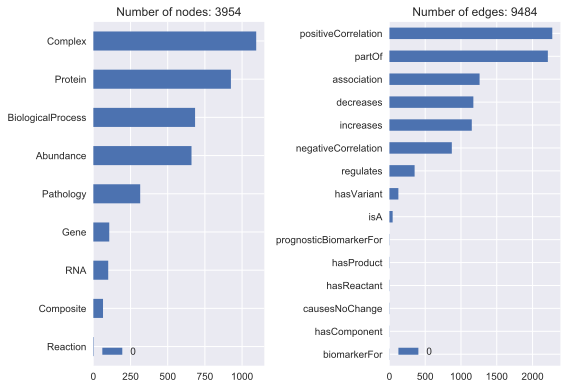

In [10]:
fig, axes = plt.subplots(1, 2)
lax = axes[0]
rax = axes[1]

ntc = pybel.struct.summary.node_summary.count_functions(covid_19_knowledge_graph)
etc = pybel.struct.summary.count_relations(covid_19_knowledge_graph)

df = pd.DataFrame.from_dict(dict(ntc), orient='index')
df_ec = pd.DataFrame.from_dict(dict(etc), orient='index')

df.sort_values(0, ascending=True).plot(kind='barh', ax=lax)
lax.set_title('Number of nodes: {}'.format(covid_19_knowledge_graph.number_of_nodes()))

df_ec.sort_values(0, ascending=True).plot(kind='barh', ax=rax)
rax.set_title('Number of edges: {}'.format(covid_19_knowledge_graph.number_of_edges()))

plt.tight_layout()

# Export
plt.savefig("nodes_edges_summary.svg")

### Summary of Namespaces Used

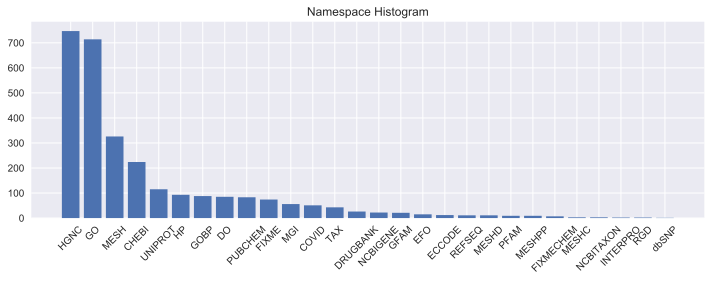

In [11]:
namespace_counter = pybel.struct.summary.count_namespaces(covid_19_knowledge_graph)

plt.figure(figsize=(10, 4))

labels = sorted(namespace_counter, key=namespace_counter.get, reverse=True)
index = range(len(labels))
plt.xticks(index, labels, rotation=45)
plt.bar(index, [namespace_counter[v] for v in labels])

plt.title('Namespace Histogram')

plt.tight_layout()

# Export
plt.savefig("namespace_summary.svg")